In [17]:
# Import necessary modules
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import datetime


In [2]:
# Read the medline.csv file to a Pandas dataframe
df = pd.read_csv('medline.csv')

# Drop rows with any null values
df.dropna(inplace= True)

# Add an 'article_id' column
df.insert(0, 'article_id', df.index + 1)

# Visualize data
df

,article_id,Article_Title,Authors,Publication_Date,Abstract
0,1,High microbial translocation limits gut immune...,"['Kantamala, Doungnapa', 'Praparattanapan, Jut...",2020 Dec,BACKGROUND: Individuals residing in areas with...
1,2,High sleep-related breathing disorders among H...,"['Chen, Chang-Chun', 'Lin, Cheng-Yu', 'Chen, Y...",2020 Nov,BACKGROUND: Sleep-related breathing disorders ...
2,3,"Design, synthesis and SAR study of novel C2-py...","['Patel, Manoj', 'Cianci, Christopher', 'Allar...",2020 Nov 1,"The design, synthesis and structure-activity r..."
3,4,Association of maternal and infant inflammatio...,"['Sevenoaks, Tatum', 'Wedderburn, Catherine J'...",2021 Jan,HIV-exposed uninfected (HEU) children may have...
4,5,Head-to-head comparison of Enzyme Linked Immun...,"['Tiwari, Aseem Kumar', 'Upadhyay, Anand Praka...",2020 Nov,Safe blood transfusion being the cornerstone o...
...,...,...,...,...,...
9375,9376,"Focus on perchlozone, an anti-tuberculosis dru...","['Malik, Ivan', 'Cizmarik, Jozef', 'Pechacova,...",2020 Winter,The prevalence of multidrug-resistant tubercul...
9376,9377,Cytokine levels of interleukin-2 and 7 amongst...,"['Ikomey, George Mondinde', 'Mbakam, Cedric Ha...",2020 Jan,BACKGROUND: Immune reconstitution complication...
9377,9378,Older Versus Younger Men Who Have Sex with Men...,"['Klein, Hugh', 'Washington, Thomas Alex']",2020,Purpose: This paper compares younger (aged 18-...
9378,9379,One-step sequence and structure-guided optimiz...,"['Malladi, Sameer Kumar', 'Schreiber, David', ...",2020,Stabilization of the metastable envelope glyco...


In [3]:
# Check the data types in the data frame
df.dtypes

article_id           int64
Article_Title       object
Authors             object
Publication_Date    object
Abstract            object
dtype: object

In [4]:
# Remove rows that only have a year and no months
df_monthyear = df[~df['Publication_Date'].str.isdigit()].copy()

df_monthyear

,article_id,Article_Title,Authors,Publication_Date,Abstract
0,1,High microbial translocation limits gut immune...,"['Kantamala, Doungnapa', 'Praparattanapan, Jut...",2020 Dec,BACKGROUND: Individuals residing in areas with...
1,2,High sleep-related breathing disorders among H...,"['Chen, Chang-Chun', 'Lin, Cheng-Yu', 'Chen, Y...",2020 Nov,BACKGROUND: Sleep-related breathing disorders ...
2,3,"Design, synthesis and SAR study of novel C2-py...","['Patel, Manoj', 'Cianci, Christopher', 'Allar...",2020 Nov 1,"The design, synthesis and structure-activity r..."
3,4,Association of maternal and infant inflammatio...,"['Sevenoaks, Tatum', 'Wedderburn, Catherine J'...",2021 Jan,HIV-exposed uninfected (HEU) children may have...
4,5,Head-to-head comparison of Enzyme Linked Immun...,"['Tiwari, Aseem Kumar', 'Upadhyay, Anand Praka...",2020 Nov,Safe blood transfusion being the cornerstone o...
...,...,...,...,...,...
9342,9343,Occupational accidents by biological risk in c...,"['Ochoa-Gelvez, Edwin Omar', 'Hernandez-Herrer...",2020 Sep 21,BACKGROUND: Clinical laboratory workers are at...
9360,9361,Accounting for Informative Sampling in Estimat...,"['Mishra, Anu', 'Buzkova, Petra', 'Balkus, Jen...",2020 Jan,The relationship between hormonal contraceptiv...
9363,9364,Detection of cytomegalovirus in plasma of pati...,"['Valdez-Salazar, Hilda Alicia', 'Sanchez-Naje...",2020 Apr 13,BACKGROUND: Cytomegalovirus (CMV) is able to c...
9375,9376,"Focus on perchlozone, an anti-tuberculosis dru...","['Malik, Ivan', 'Cizmarik, Jozef', 'Pechacova,...",2020 Winter,The prevalence of multidrug-resistant tubercul...


In [5]:
# Clean the data for visualization

# Remove Characters after a -  or / in date column
df_monthyear['Publication_Date'] = df_monthyear['Publication_Date'].apply(lambda x: x.split('-')[0])
df_monthyear['Publication_Date'] = df_monthyear['Publication_Date'].apply(lambda x: x.split('/')[0])

# Visualize the data
df_monthyear

,article_id,Article_Title,Authors,Publication_Date,Abstract
0,1,High microbial translocation limits gut immune...,"['Kantamala, Doungnapa', 'Praparattanapan, Jut...",2020 Dec,BACKGROUND: Individuals residing in areas with...
1,2,High sleep-related breathing disorders among H...,"['Chen, Chang-Chun', 'Lin, Cheng-Yu', 'Chen, Y...",2020 Nov,BACKGROUND: Sleep-related breathing disorders ...
2,3,"Design, synthesis and SAR study of novel C2-py...","['Patel, Manoj', 'Cianci, Christopher', 'Allar...",2020 Nov 1,"The design, synthesis and structure-activity r..."
3,4,Association of maternal and infant inflammatio...,"['Sevenoaks, Tatum', 'Wedderburn, Catherine J'...",2021 Jan,HIV-exposed uninfected (HEU) children may have...
4,5,Head-to-head comparison of Enzyme Linked Immun...,"['Tiwari, Aseem Kumar', 'Upadhyay, Anand Praka...",2020 Nov,Safe blood transfusion being the cornerstone o...
...,...,...,...,...,...
9342,9343,Occupational accidents by biological risk in c...,"['Ochoa-Gelvez, Edwin Omar', 'Hernandez-Herrer...",2020 Sep 21,BACKGROUND: Clinical laboratory workers are at...
9360,9361,Accounting for Informative Sampling in Estimat...,"['Mishra, Anu', 'Buzkova, Petra', 'Balkus, Jen...",2020 Jan,The relationship between hormonal contraceptiv...
9363,9364,Detection of cytomegalovirus in plasma of pati...,"['Valdez-Salazar, Hilda Alicia', 'Sanchez-Naje...",2020 Apr 13,BACKGROUND: Cytomegalovirus (CMV) is able to c...
9375,9376,"Focus on perchlozone, an anti-tuberculosis dru...","['Malik, Ivan', 'Cizmarik, Jozef', 'Pechacova,...",2020 Winter,The prevalence of multidrug-resistant tubercul...


In [6]:
# Convert 'Publication Date' column to date format
df_monthyear['Publication_Date'] = pd.to_datetime(df_monthyear['Publication_Date'], errors='coerce')

In [7]:
# Keep only rows with articles in our date range 01/01/2020-08/30/2020

start_date = '2020-01-01'
end_date = '2020-08-30'
mask = (df_monthyear['Publication_Date'] > start_date) & (df_monthyear['Publication_Date'] <= end_date)

df_2020 = df_monthyear.loc[mask]

#Visualize the data
df_2020


,article_id,Article_Title,Authors,Publication_Date,Abstract
8,9,Comorbidities and HCV coinfection in the manag...,"['Garagiola, Elisabetta', 'Foglia, Emanuela', ...",2020-08-29,BACKGROUND: Since HIV+ treatment has become mo...
16,17,Retrospective Hospital-based Study of Opportun...,"['Onkarappa, Saroja A', 'Panpalia, Nikhil G', ...",2020-07-01,Background: Patients with retroviral disease a...
17,18,Barriers in accessing HIV care for Francophone...,"['Djiadeu, Pascal', 'Yusuf, Abban', 'Ongolo-Zo...",2020-08-27,"INTRODUCTION: In 2001, 50%-55% of French-speak..."
18,19,Self-reported disability in relation to mortal...,"['Prynn, Josephine E', 'Dube, Albert', 'Mkanda...",2020-08-27,OBJECTIVES: We investigated whether self-repor...
20,21,Interpersonal reactivity index adaptation amon...,"['Sack, Daniel E', 'Frisby, Michael B', 'Dieme...",2020-08-28,BACKGROUND: The ability to understand another'...
...,...,...,...,...,...
9309,9310,Preferences for implementation of HIV pre-expo...,"['Edelman, E Jennifer', 'Moore, Brent A', 'Cal...",2020-03-01,Primary care physicians (PCPs) are critical fo...
9317,9318,Resurgence of ocular syphilis in British Colum...,"['Eslami, Maryam', 'Noureddin, Gelareh', 'Pakz...",2020-04-01,OBJECTIVE: To characterize the trends and expl...
9320,9321,Analyses of HIV-1 integrase gene sequences amo...,"['Onoriode Digban, Tennison', 'Chucks Iweriebo...",2020-08-01,Drug resistance has been recognized in all ava...
9322,9323,Impact of Early Antiretroviral Therapy Initiat...,"['Rinaldi, Stefano', 'Pallikkuth, Suresh', 'Ca...",2020-02-01,Early initiation of antiretroviral therapy (AR...


In [8]:
# Count number of articles per month
df_count = df_2020.resample('M', on='Publication_Date').article_id.nunique()

# Visualize 
df_count


Publication_Date
2020-01-31    216
2020-02-29    423
2020-03-31    580
2020-04-30    658
2020-05-31    666
2020-06-30    723
2020-07-31    800
2020-08-31    738
Freq: M, Name: article_id, dtype: int64

In [9]:
print('Descriptive Statistics for articles containing the word "Outbreak" per month in 2019\n')
desc = df_count.describe()

print(desc)


Descriptive Statistics for articles containing the word "Outbreak" per month in 2019

count      8.000000
mean     600.500000
std      193.123203
min      216.000000
25%      540.750000
50%      662.000000
75%      726.750000
max      800.000000
Name: article_id, dtype: float64


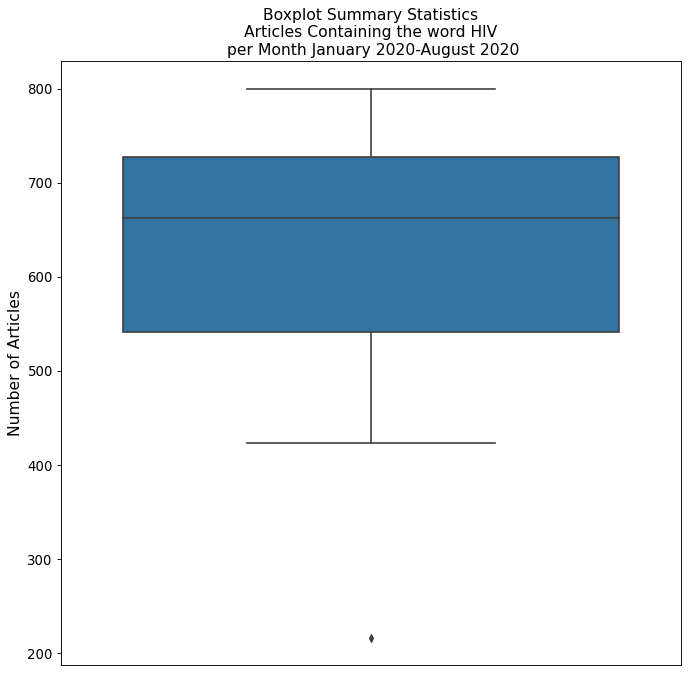

In [10]:
# Create a box plot to visualize the summary statistics
# ----------------------------------------------------------------------------------------------------

# instanciate the figure
plt.figure(figsize = (10, 10), dpi = 80)
# plot the data using seaborn
ax = sns.boxplot(data = df_count)


# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the font of y ticks (numbers on the axis)
ax.tick_params(axis = 'y', labelsize = 12)

# Remove x tick and label
ax.axes.xaxis.set_visible(False)

# set and x and y label
ax.set_ylabel("Number of Articles", fontsize = 14)

# set a title
ax.set_title("Boxplot Summary Statistics\nArticles Containing the word HIV\n per Month January 2020-August 2020", fontsize = 14);

In [18]:
# Add month column to data frame
df_2020['Month'] = df_2020['Publication_Date'].dt.strftime('%B')

In [30]:
# Add boxplot to visualize summary statistics per month
ax = sns.boxplot(x="month", y = df_2020.article_id.count(), data=df_2020)
 
# Calculate number of obs per group & median to position labels
#medians = df_2020.groupby(['month'])['article_id'].median().values
#nobs = df_2020['month'].value_counts().values
#nobs = [str(x) for x in nobs.tolist()]
#nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
#pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')
 
plt.show()

AttributeError: 'bool' object has no attribute 'all'

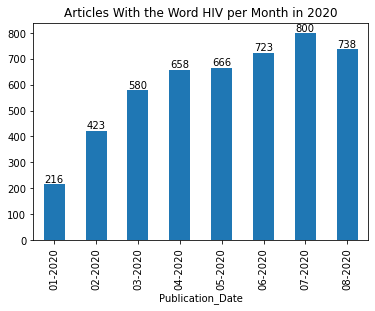

In [29]:
# Create a bar graph to show the number of articles in each month containing outbreak
ax = df_count.plot.bar()

# Change x tick labels to month-year format
ax.set_xticklabels(df_count.index.strftime('%m-%Y'))

# Add title to graph
ax.set_title('Articles With the Word HIV per Month in 2020')

# Add labels to bars
ax.bar_label(ax.containers[0], label_type='edge')

# Show the graph
plt.show()

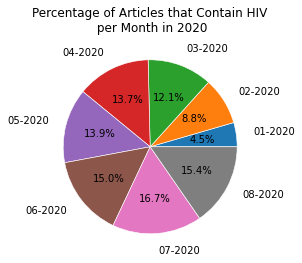

In [30]:
# Create a pie chart 

# Set variables
names = df_count.index.strftime('%m-%Y')
values= df_count

# Label distance gives the space between labels and the center of the pie
plt.pie(values, autopct='%.1f%%',
        labels=names, labeldistance=1.2, 
        # Add white space between wedges
        wedgeprops = { 'linewidth' : .6, 'edgecolor' : 'white' })

# Add title to the pie chart
plt.title('Percentage of Articles that Contain HIV\n per Month in 2020')

# Show pie chart
plt.show();